In [1]:
# Imports
import pandas as pd
import numpy as np
import random
random.seed(0)
import os
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy import ndimage, signal
import glob
import cv2
import warnings
warnings.filterwarnings("ignore")

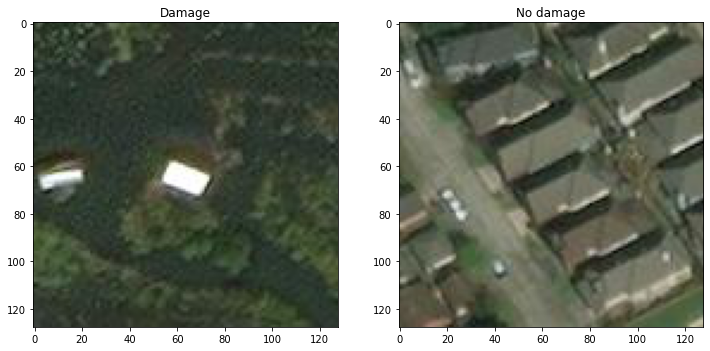

In [2]:
# Sample images
damage_sample = imread("./Images/train_another/damage/-93.65871_30.026395.jpeg")
no_damage_sample = imread("./Images/train_another/no_damage/-95.6266_29.860549.jpeg")
plt.figure(figsize=(12, 20))
plt.subplot(121)
plt.imshow(damage_sample)
plt.title("Damage")
plt.subplot(122)
plt.imshow(no_damage_sample)
plt.title("No damage")
plt.show()

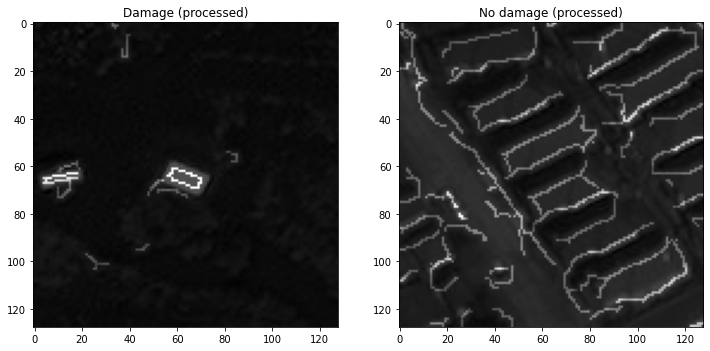

In [3]:
# Image processing
### Step 1: Guassian blur
### Step 2: Erosion
### Step 3: Edge detection
### Step 4: Edge enhancement

# Function to enhance edges
def process(images, save_dir=None):
    processed_images = []
    for i in range(len(images)):
        # Gaussian blur
        gaussian_img = cv2.GaussianBlur(images[i], (3, 3), 1)
        # Erosion
        kernel = np.ones((3, 3), np.uint8)
        eroded_img = cv2.erode(gaussian_img, kernel, iterations=2)
        # Edge detection
        canny_img = cv2.Canny(eroded_img, 80, 120) - np.ones(shape=(128, 128))
        # Enhance edges
        processed_img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY) + 0.5*cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)*(canny_img//254)
        processed_images.append(processed_img)
        if save_dir:
            # Save processed image
            cv2.imwrite(os.path.join(save_dir, f'{i+1}.jpeg'), processed_img)
    return processed_images

damage_processed = process([damage_sample], save_dir=None)[0]
no_damage_processed = process([no_damage_sample], save_dir=None)[0]
plt.figure(figsize=(12, 20))
plt.subplot(121)
plt.imshow(damage_processed, cmap="gray")
plt.title("Damage (processed)")
plt.subplot(122)
plt.imshow(no_damage_processed, cmap="gray")
plt.title("No damage (processed)")
plt.show()

In [4]:
damage = [cv2.imread(file) for file in glob.glob('./Images/train_another/damage/*.jpeg')] + [cv2.imread(file) for file in glob.glob('./Images/test/damage/*.jpeg')] + [cv2.imread(file) for file in glob.glob('./Images/validation_another/damage/*.jpeg')]
no_damage = [cv2.imread(file) for file in glob.glob('./Images/train_another/no_damage/*.jpeg')] + [cv2.imread(file) for file in glob.glob('./Images/test/no_damage/*.jpeg')] + [cv2.imread(file) for file in glob.glob('./Images/validation_another/no_damage/*.jpeg')]

random.shuffle(damage)
random.shuffle(no_damage)

train_damage, test_damage, val_damage = damage[0:5000], damage[5000:6000], damage[6000:7000]
train_no_damage, test_no_damage, val_no_damage = no_damage[0:5000], no_damage[5000:6000], no_damage[6000:7000]

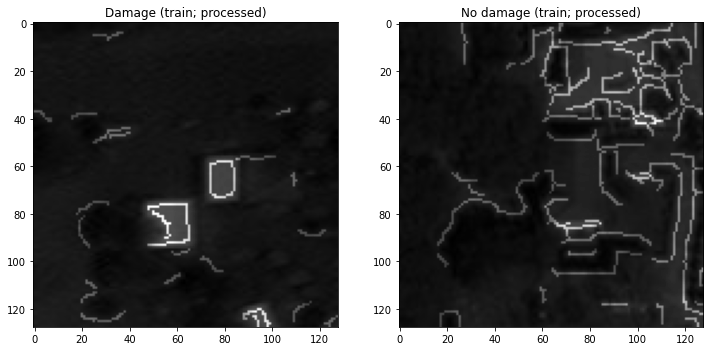

In [5]:
os.makedirs("./Processed_Images/train/damage")
os.makedirs("./Processed_Images/train/no_damage")
train_damage_proc = process(train_damage, save_dir = "./Processed_Images/train/damage")
train_no_damage_proc = process(train_no_damage, save_dir = "./Processed_Images/train/no_damage")

plt.figure(figsize=(12, 20))
plt.subplot(121)
plt.imshow(train_damage_proc[10], cmap="gray")
plt.title("Damage (train; processed)")
plt.subplot(122)
plt.imshow(train_no_damage_proc[10], cmap="gray")
plt.title("No damage (train; processed)")
plt.show()

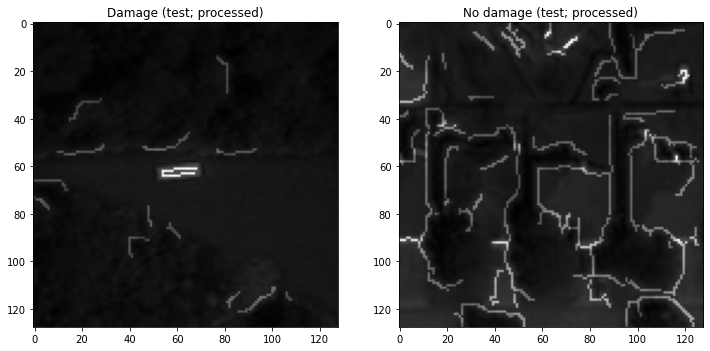

In [6]:
os.makedirs("./Processed_Images/test/damage")
os.makedirs("./Processed_Images/test/no_damage")
test_damage_proc = process(test_damage, save_dir = "./Processed_Images/test/damage")
test_no_damage_proc = process(test_no_damage, save_dir = "./Processed_Images/test/no_damage")

plt.figure(figsize=(12, 20))
plt.subplot(121)
plt.imshow(test_damage_proc[10], cmap="gray")
plt.title("Damage (test; processed)")
plt.subplot(122)
plt.imshow(test_no_damage_proc[10], cmap="gray")
plt.title("No damage (test; processed)")
plt.show()

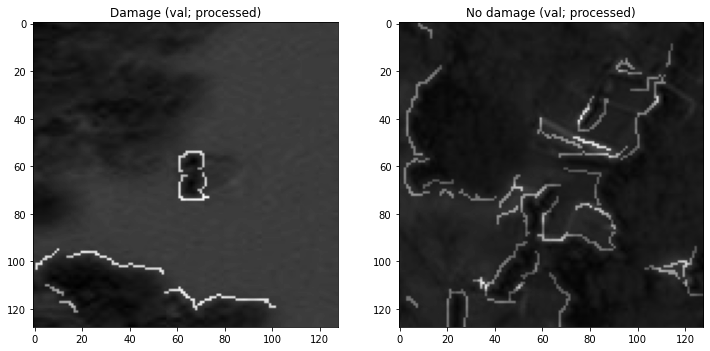

In [7]:
os.makedirs("./Processed_Images/val/damage")
os.makedirs("./Processed_Images/val/no_damage")
val_damage_proc = process(val_damage, save_dir = "./Processed_Images/val/damage")
val_no_damage_proc = process(val_no_damage, save_dir = "./Processed_Images/val/no_damage")

plt.figure(figsize=(12, 20))
plt.subplot(121)
plt.imshow(val_damage_proc[10], cmap="gray")
plt.title("Damage (val; processed)")
plt.subplot(122)
plt.imshow(val_no_damage_proc[10], cmap="gray")
plt.title("No damage (val; processed)")
plt.show()